## Import the libraries

In [54]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf
import PIL as image

from matplotlib import pyplot as plt


print('Tensorflow version', tf.__version__)

Tensorflow version 1.13.1


## Be ready with an image for processing

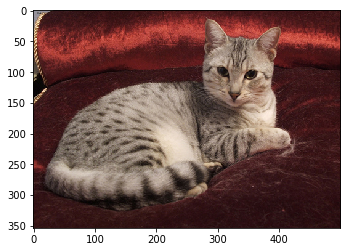

In [55]:
imagepath = 'images/train/cats/cat3.jpg'

plt.imshow(plt.imread(imagepath))

## Rotation

Found 1 images belonging to 2 classes.


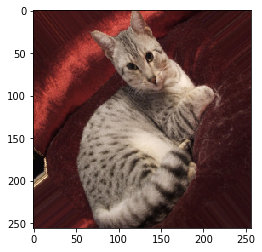

In [27]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 60
)

x,y = next(generator.flow_from_directory('images', batch_size=1))

plt.imshow(x[0].astype('uint8'));

## Width and Height Shift

Found 1 images belonging to 2 classes.


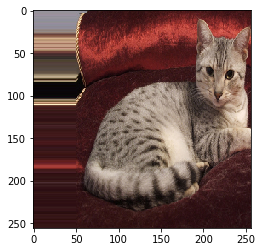

In [56]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range =  [-50, 0, 50],
    height_shift_range = [-50, 0, 50]
)

x,y = next(generator.flow_from_directory('images', batch_size=1))

plt.imshow(x[0].astype('uint8'));

## Brightness

Found 1 images belonging to 2 classes.


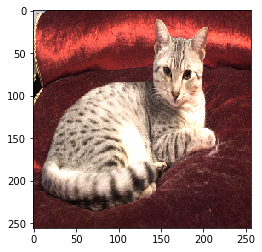

In [32]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range = (0.5, 2.)
)
x,y = next(generator.flow_from_directory('images', batch_size=1))

plt.imshow(x[0].astype('uint8'));

## Shear Transformation

Found 1 images belonging to 2 classes.


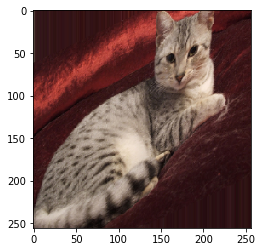

In [33]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range = 40
)
x,y = next(generator.flow_from_directory('images', batch_size=1))

plt.imshow(x[0].astype('uint8'));

## Zooming

Found 1 images belonging to 2 classes.


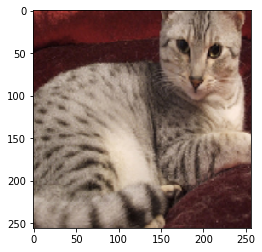

In [36]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range = (0.5, 2.)
)
x,y = next(generator.flow_from_directory('images', batch_size=1))

plt.imshow(x[0].astype('uint8'));

## Channel shift (RGB)

Found 1 images belonging to 2 classes.


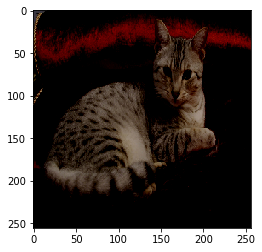

In [37]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range = 100
)
x,y = next(generator.flow_from_directory('images', batch_size=1))

plt.imshow(x[0].astype('uint8'));

## Flipping

Found 1 images belonging to 2 classes.


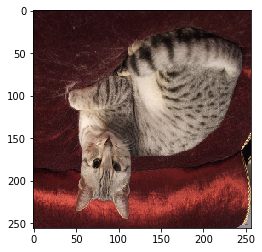

In [38]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip = True, 
    vertical_flip = True
)
x,y = next(generator.flow_from_directory('images', batch_size=1))

plt.imshow(x[0].astype('uint8'));

## Normalization - Featurewise

In [39]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization = True
)

generator.fit(x_train)

170500096/170498071 [==============================] - 655s 4us/step


In [40]:
x,y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

0.54421043 1.123929 [[5]]
120.70756512369792


## Normalization - Samplewise

In [41]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
   samplewise_center = True,
   samplewise_std_normalization = True
)

x,y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

0.0 1.0 [[1]]


## Rescale and Preprocessing

In [48]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
   rescale = 1.,
   preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input
)

In [49]:
x,y = next(generator.flow(x_train, y_train, batch_size=1))

In [50]:
print(x.mean(), x.std(), y)

0.14252709 0.5732062 [[8]]


## Model Training

In [51]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
   preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
   horizontal_flip=True,
   rotation_range=20
)

In [52]:
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
      include_top=False, input_shape=(32, 32, 3),
      pooling='avg'
    ),
    
    tf.keras.layers.Dense(10, activation='softmax')
    
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

E:\Programs\Anaconda3\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Instructions for updating:
Colocations handled automatically by placer.
9412608/9406464 [==============================] - 29s 3us/step


## Model fitting

In [53]:
_ = model.fit(
    generator.flow(x_train, y_train, batch_size=32),
    epochs=1, steps_per_epoch=10
)

Instructions for updating:
Use tf.cast instead.
1563/1563 [==============================] - 1236s 791ms/step - loss: 2.2588 - acc: 0.2900
